In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
from scipy import misc,ndimage
from progressbar import ProgressBar
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn import svm
import warnings
from sklearn.svm.base import _fit_liblinear, BaseSVC, BaseLibSVM
#from sklearn.base import BaseEstimator, RegressorMixin, OutlierMixin
from sklearn.linear_model.base import LinearClassifierMixin, SparseCoefMixin, LinearModel
from sklearn.utils import check_X_y
from sklearn.utils.validation import _num_samples
from sklearn.utils.multiclass import check_classification_targets
import mxnet as mx   

C:\Users\barot\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


AttributeError: module 'pandas' has no attribute 'plotting'

In [3]:
tr_path='C:\\Users\\barot\\Desktop\ml work\dl2'
tr_csv = pd.read_csv(tr_path+'\\train.csv')

<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<input>:1: DeprecationWarning: invalid escape sequence \m
<ipython-input-3-b136660b7721>:1: DeprecationWarning: invalid escape sequence \m
  tr_path='C:\\Users\\barot\\Desktop\ml work\dl2'


In [7]:
img = imageio.imread(tr_path+'\\train_\\scan_00010014.png')
img = np.asarray(img)
print(img)

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [11 18 17 ... 13 13  8]
 [12 20 18 ... 14 15  8]
 [ 6 11 10 ...  7  7  4]]


In [11]:
arr=np.empty(shape=[1024,1024],dtype='uint8')
for i in range(1024):
    for j in range(1024):
            arr[i][j]=255

In [12]:
img3 = arr-img 

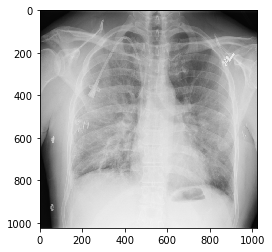

In [7]:
plt.imshow(img,cmap='gray')
plt.show()

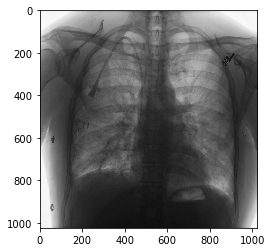

In [8]:
plt.imshow(img3,cmap='gray')
plt.show()

In [13]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
dst2 = cv2.filter2D(img3,-1,kernel)
blur = cv2.GaussianBlur(img,(5,5),0)
blur2 = cv2.GaussianBlur(img3,(5,5),0)

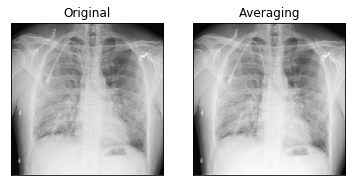

In [14]:
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

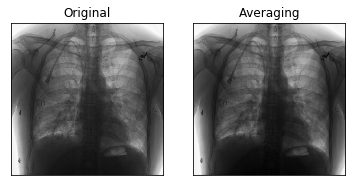

In [15]:
plt.subplot(121),plt.imshow(img3,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

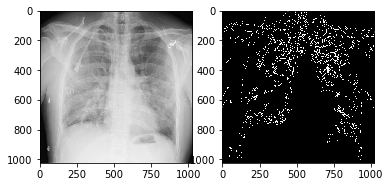

In [16]:
edges = cv2.Canny(img,10,80)
plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(edges,cmap='gray')
plt.savefig('edges2.jpg',dpi=1000)
plt.show()

In [17]:
img_1000 = []
bar=ProgressBar(max_value=1000)
for i in range(1000):
    img_1000.append(np.asarray(imageio.imread(tr_path+'\\train_\\{}'.format(tr_csv['image_name'][i]))))
    bar.update(i)

 99% (996 of 1000) |##################### | Elapsed Time: 0:00:28 ETA:  0:00:00

In [22]:
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
bar=ProgressBar(max_value=1000)
for i in range(10):
    hp = ndimage.convolve(img, kernel)
    lowpass = ndimage.gaussian_filter(img, 3)
    ghp = np.asarray(imageio.imread(tr_path+'\\train_\\{}'.format(tr_csv['image_name'][i]))) - lowpass
    plt.subplot(121)
    plt.imshow(ghp-hp,cmap='gray')
    #plt.subplot(122),plt.imshow(ghp,cmap='gray')
    plt.savefig('edges/edges{}.jpg'.format(i),dpi=1000)
    #img_1000.append(np.asarray(imageio.imread(tr_path+'\\train_\\{}'.format(tr_csv['image_name'][i]))))
    bar.update(i)

  0% (9 of 1000) |                        | Elapsed Time: 0:00:31 ETA:  0:57:22

In [18]:
imgt = imageio.imread('C:\\Users\\barot\\Downloads\\wallpics\\black_and_gold_bugatti_w1.jpg')
imgt = np.array(imgt)

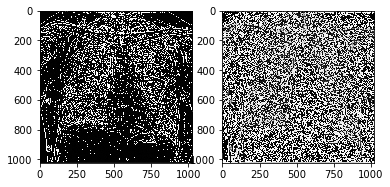

In [18]:
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
hp = ndimage.convolve(img, kernel)
lowpass = ndimage.gaussian_filter(img, 3)
ghp = img - lowpass
plt.subplot(121)
plt.imshow(ghp,cmap='gray')
#plt.subplot(122),plt.imshow(ghp,cmap='gray')
plt.savefig('edges2.jpg',dpi=1000)
plt.subplot(122)
plt.imshow(hp,cmap='gray')
#  plt.subplot(121)
# plt.imshow(img)
plt.savefig('hp.jpg',dpi=1000)

plt.show()

In [17]:
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
hp = ndimage.convolve(img3, kernel)

plt.subplot(121),plt.imshow(img3,cmap='gray')
plt.subplot(122),plt.imshow(hp,cmap='gray')
plt.savefig('edges2.jpg',dpi=1000)
plt.show()

NameError: name 'img3' is not defined

In [5]:
trdf = pd.DataFrame()
trdf=trdf.append(tr_csv[:1000],ignore_index=True)
img_1000 = []
bar=ProgressBar(max_value=1000)
trdf['arr']=np.zeros(1000,dtype=object)
print(trdf.arr.loc[1])
for i in range(1000):
    trdf.arr.loc[i]=np.asarray(imageio.imread(tr_path+'\\train_\\{}'.format(trdf['image_name'][i])))
    bar.update(i)
#arr=pd.DataFrame(data={'arr':img_1000},index=range(1000))


0


C:\Users\barot\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
 99% (998 of 1000) |##################### | Elapsed Time: 0:02:10 ETA:  0:00:00

In [4]:
y=trdf.detected
#trdf.drop(['detected'],axis=1,inplace=True)
trdf.drop(['image_name','row_id'],axis=1,inplace=True)
#trdf['labels'] = tr_csv['detected']
oha=pd.get_dummies(trdf['detected'])
ohsmf=pd.get_dummies(trdf['gender'])
trdf.drop(['gender','detected'],axis=1,inplace=True)
#trdf=trdf.join(oha)
trdf=trdf.join(ohsmf)

NameError: name 'trdf' is not defined

In [18]:
trdf.drop(['class_1','class_2','class_3','class_4','class_5','class_6','class_7','class_8','class_9','class_10','class_11','class_12','class_13','class_14'],axis=1,inplace=True)


In [3]:
cv2.VideoCapture(0)

<VideoCapture 000001C70A008FD0>

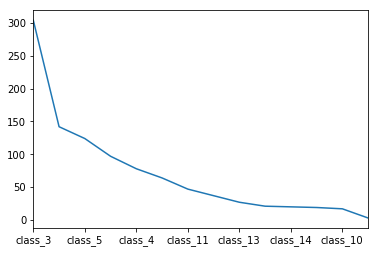

In [7]:
pl=y.value_counts().plot()
plt.show()

In [6]:
trdf

,age,view_position,arr,F,M
0,45,0,"[[0, 57, 81, 81, 90, 103, 108, 111, 109, 104, ...",0,1
1,57,0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1,0
2,58,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,1
3,64,0,"[[7, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9...",0,1
4,33,1,"[[242, 239, 239, 236, 234, 232, 228, 222, 212,...",0,1
5,68,1,"[[217, 204, 189, 171, 154, 146, 132, 122, 115,...",1,0
6,46,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,...",1,0
7,63,0,"[[4, 7, 6, 7, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6,...",1,0
8,56,1,"[[4, 7, 6, 6, 6, 8, 9, 10, 11, 12, 12, 13, 14,...",0,1
9,21,0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1,0


In [5]:
x_tr,x_ts,y_tr,y_ts=train_test_split(trdf[['age','gender','view_position','arr']],trdf['labels'],train_size=0.8)

In [6]:
# Random Forest Classification

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(tr_csv)#, names=names)
#array = rt_csv.values
#X = array[:,0:8]
#Y = array[:,8]
seed = 7
num_trees = 100
max_features = 4
d=x_tr.to_dict()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
#model.fit(d,y_tr)
results = model_selection.cross_val_score(model, x_tr, y_tr, cv=kfold)
print(results.mean())

ValueError: setting an array element with a sequence.

In [10]:
model = svm.SVC(decision_function_shape='ovo')
model.fit(superl
          ,oha)

ValueError: setting an array element with a sequence.

In [9]:
age=list(trdf['age'])
m=list(trdf['M'])
f=list(trdf['F'])
arr=list(trdf['arr'])
vp=list(trdf['view_position'])
superl=[age,m,f,arr,vp]

In [13]:
d={"class_1":,"class_2":,"class_3":,"class_4":,"class_5":,"class_6":,"class_7":,"class_8":,"class_9":,"class_10":,"class_11":,"class_12":,"class_13":,"class_14":}

[45,
 57,
 58,
 64,
 33,
 68,
 46,
 63,
 56,
 21,
 16,
 43,
 60,
 55,
 41,
 13,
 59,
 60,
 28,
 28,
 42,
 63,
 49,
 52,
 47,
 31,
 56,
 19,
 55,
 54,
 40,
 45,
 28,
 65,
 41,
 53,
 57,
 45,
 72,
 60,
 54,
 47,
 55,
 24,
 50,
 25,
 56,
 42,
 52,
 25,
 26,
 39,
 45,
 24,
 38,
 57,
 63,
 26,
 38,
 60,
 58,
 46,
 48,
 44,
 30,
 53,
 56,
 70,
 33,
 61,
 66,
 67,
 30,
 73,
 54,
 72,
 48,
 28,
 18,
 34,
 64,
 26,
 43,
 46,
 62,
 70,
 73,
 68,
 40,
 27,
 60,
 47,
 20,
 23,
 34,
 24,
 32,
 44,
 60,
 64,
 28,
 46,
 44,
 78,
 37,
 75,
 24,
 53,
 18,
 25,
 52,
 50,
 52,
 52,
 42,
 44,
 51,
 53,
 76,
 50,
 28,
 40,
 52,
 41,
 45,
 52,
 63,
 47,
 54,
 23,
 45,
 68,
 2,
 75,
 46,
 64,
 57,
 9,
 58,
 56,
 42,
 78,
 47,
 65,
 10,
 53,
 67,
 57,
 55,
 44,
 34,
 67,
 59,
 62,
 48,
 57,
 56,
 47,
 38,
 62,
 62,
 61,
 77,
 50,
 52,
 49,
 19,
 51,
 72,
 50,
 66,
 39,
 68,
 61,
 30,
 42,
 17,
 55,
 64,
 46,
 59,
 10,
 24,
 38,
 51,
 46,
 42,
 16,
 56,
 57,
 55,
 25,
 46,
 48,
 50,
 75,
 22,
 74,
 21,
 47,
 6

In [18]:
oha


,class_1,class_10,class_11,class_12,class_13,class_14,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
class LinearSVC(BaseEstimator, LinearClassifierMixin,
                SparseCoefMixin):

    def __init__(self, penalty='l2', loss='squared_hinge', dual=True, tol=1e-4,
                 C=1.0, multi_class='ovr', fit_intercept=True,
                 intercept_scaling=1, class_weight=None, verbose=0,
                 random_state=None, max_iter=1000):
        self.dual = dual
        self.tol = tol
        self.C = C
        self.multi_class = multi_class
        self.fit_intercept = fit_intercept
        self.intercept_scaling = intercept_scaling
        self.class_weight = class_weight
        self.verbose = verbose
        self.random_state = random_state
        self.max_iter = max_iter
        self.penalty = penalty
        self.loss = loss

    def fit(self, X, y, sample_weight=None):
        
        # FIXME Remove l1/l2 support in 1.0 -----------------------------------
        msg = ("loss='%s' has been deprecated in favor of "
               "loss='%s' as of 0.16. Backward compatibility"
               " for the loss='%s' will be removed in %s")

        if self.loss in ('l1', 'l2'):
            old_loss = self.loss
            self.loss = {'l1': 'hinge', 'l2': 'squared_hinge'}.get(self.loss)
            warnings.warn(msg % (old_loss, self.loss, old_loss, '1.0'),
                          DeprecationWarning)

        if self.C < 0:
            raise ValueError("Penalty term must be positive; got (C=%r)"
                             % self.C)

        X, y = check_X_y(X, y, accept_sparse='csr',
                         dtype=np.float64, order="C")
        check_classification_targets(y)
        self.classes_ = np.unique(y)

        self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
            X, y, self.C, self.fit_intercept, self.intercept_scaling,
            self.class_weight, self.penalty, self.dual, self.verbose,
            self.max_iter, self.tol, self.random_state, self.multi_class,
            self.loss, sample_weight=sample_weight)

        if self.multi_class == "crammer_singer" and len(self.classes_) == 2:
            self.coef_ = (self.coef_[1] - self.coef_[0]).reshape(1, -1)
            if self.fit_intercept:
                intercept = self.intercept_[1] - self.intercept_[0]
                self.intercept_ = np.array([intercept])

        return self


class LinearSVR(LinearModel, RegressorMixin):
    

    def __init__(self, epsilon=0.0, tol=1e-4, C=1.0,
                 loss='epsilon_insensitive', fit_intercept=True,
                 intercept_scaling=1., dual=True, verbose=0,
                 random_state=None, max_iter=1000):
        self.tol = tol
        self.C = C
        self.epsilon = epsilon
        self.fit_intercept = fit_intercept
        self.intercept_scaling = intercept_scaling
        self.verbose = verbose
        self.random_state = random_state
        self.max_iter = max_iter
        self.dual = dual
        self.loss = loss

    def fit(self, X, y, sample_weight=None):
        msg = ("loss='%s' has been deprecated in favor of "
               "loss='%s' as of 0.16. Backward compatibility"
               " for the loss='%s' will be removed in %s")

        if self.loss in ('l1', 'l2'):
            old_loss = self.loss
            self.loss = {'l1': 'epsilon_insensitive',
                         'l2': 'squared_epsilon_insensitive'
                         }.get(self.loss)
            warnings.warn(msg % (old_loss, self.loss, old_loss, '1.0'),
                          DeprecationWarning)

        if self.C < 0:
            raise ValueError("Penalty term must be positive; got (C=%r)"
                             % self.C)

        X, y = check_X_y(X, y, accept_sparse='csr',
                         dtype=np.float64, order="C")
        penalty = 'l2'  # SVR only accepts l2 penalty
        self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
            X, y, self.C, self.fit_intercept, self.intercept_scaling,
            None, penalty, self.dual, self.verbose,
            self.max_iter, self.tol, self.random_state, loss=self.loss,
            epsilon=self.epsilon, sample_weight=sample_weight)
        self.coef_ = self.coef_.ravel()

        return self


class SVC(BaseSVC):

    _impl = 'c_svc'

    def __init__(self, C=1.0, kernel='rbf', degree=3, gamma='auto',
                 coef0=0.0, shrinking=True, probability=False,
                 tol=1e-3, cache_size=200, class_weight=None,
                 verbose=False, max_iter=-1, decision_function_shape='ovr',
                 random_state=None):

        super(SVC, self).__init__(
            kernel=kernel, degree=degree, gamma=gamma,
            coef0=coef0, tol=tol, C=C, nu=0., shrinking=shrinking,
            probability=probability, cache_size=cache_size,
            class_weight=class_weight, verbose=verbose, max_iter=max_iter,
            decision_function_shape=decision_function_shape,
            random_state=random_state)


class NuSVC(BaseSVC):
    

    _impl = 'nu_svc'

    def __init__(self, nu=0.5, kernel='rbf', degree=3, gamma='auto', coef0=0.0,
                 shrinking=True, probability=False, tol=1e-3, cache_size=200,
                 class_weight=None, verbose=False, max_iter=-1,
                 decision_function_shape='ovr', random_state=None):

        super(NuSVC, self).__init__(
            kernel=kernel, degree=degree, gamma=gamma,
            coef0=coef0, tol=tol, C=0., nu=nu, shrinking=shrinking,
            probability=probability, cache_size=cache_size,
            class_weight=class_weight, verbose=verbose, max_iter=max_iter,
            decision_function_shape=decision_function_shape,
            random_state=random_state)


class SVR(BaseLibSVM, RegressorMixin):

    _impl = 'epsilon_svr'

    def __init__(self, kernel='rbf', degree=3, gamma='auto', coef0=0.0,
                 tol=1e-3, C=1.0, epsilon=0.1, shrinking=True,
                 cache_size=200, verbose=False, max_iter=-1):

        super(SVR, self).__init__(
            kernel=kernel, degree=degree, gamma=gamma,
            coef0=coef0, tol=tol, C=C, nu=0., epsilon=epsilon, verbose=verbose,
            shrinking=shrinking, probability=False, cache_size=cache_size,
            class_weight=None, max_iter=max_iter, random_state=None)


class NuSVR(BaseLibSVM, RegressorMixin):
    

    _impl = 'nu_svr'

    def __init__(self, nu=0.5, C=1.0, kernel='rbf', degree=3,
                 gamma='auto', coef0=0.0, shrinking=True, tol=1e-3,
                 cache_size=200, verbose=False, max_iter=-1):

        super(NuSVR, self).__init__(
            kernel=kernel, degree=degree, gamma=gamma, coef0=coef0,
            tol=tol, C=C, nu=nu, epsilon=0., shrinking=shrinking,
            probability=False, cache_size=cache_size, class_weight=None,
            verbose=verbose, max_iter=max_iter, random_state=None)


class OneClassSVM(BaseLibSVM, OutlierMixin):

    _impl = 'one_class'

    def __init__(self, kernel='rbf', degree=3, gamma='auto', coef0=0.0,
                 tol=1e-3, nu=0.5, shrinking=True, cache_size=200,
                 verbose=False, max_iter=-1, random_state=None):

        super(OneClassSVM, self).__init__(
            kernel, degree, gamma, coef0, tol, 0., nu, 0.,
            shrinking, False, cache_size, None, verbose, max_iter,
            random_state)

    def fit(self, X, y=None, sample_weight=None, **params):

        if self.random_state is not None:
            warnings.warn("The random_state parameter is deprecated and will"
                          " be removed in version 0.22.", DeprecationWarning)

        super(OneClassSVM, self).fit(X, np.ones(_num_samples(X)),
                                     sample_weight=sample_weight, **params)
        self.offset_ = -self._intercept_
        return self

    def decision_function(self, X):
        dec = self._decision_function(X).ravel()
        return dec

    def score_samples(self, X):
        return self.decision_function(X) + self.offset_

    def predict(self, X):
        y = super(OneClassSVM, self).predict(X)
        return np.asarray(y, dtype=np.intp)


In [ ]:
#cnn
def simple_CNN(input_shape, num_classes):

    model = Sequential()
    model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(.5))

    model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax',name='predictions'))
    return model
